# 클래스 불균형 처리 

> <b>데이터 수준 </b>
>
> * 데이터 세트의 균형을 맞추기 위해 리샘플링 기술(언더 샘플링 or 오버 샘플링)을 적용. 

> <b>알고리즘 수준 </b>  
> * 각 클래스의 train data의 size에 따라 가중 비용을 조정하여 수행
> * ex ) SVM의 C값의 설정 및 의사결정 나무의 가중치 등 
> * 딥러닝의 Weight balancing


<img src='./오버샘플링_언더샘플링 소개.png' width=500/>

## 언더샘플링
- 다수 클래스의 샘플을 소수 클래스의 분포 비율과 일치하도록 무작위로 제거함.
- 2개의 클래스의 비율을 맞추기 위해 귀중한 정보를 잃어버리고 편향될 수 있기 때문에 작은 데이터에서는 선호되지 않음

- 오버 샘플링보다 언더 샘플링이 비용이 더 적게 듬 
- 다수의 부정적인 클래스 일부를 줄이는 것이 허용됨 

- 긍정 클래스의 정보가 많다면 언더샘플링을 하는 경향이 있음 

In [1]:
import pandas as pd

credit = pd.read_csv("../data/credit_final.csv")
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']


In [2]:
y.value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

<BarContainer object of 2 artists>

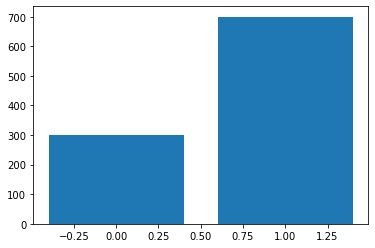

In [3]:
import matplotlib.pyplot as plt 
plt.bar(y.value_counts().index, y.value_counts().values)

In [4]:
import imblearn.under_sampling.base

In [5]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X, y)

<BarContainer object of 2 artists>

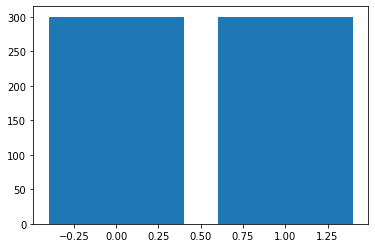

In [6]:
plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values)

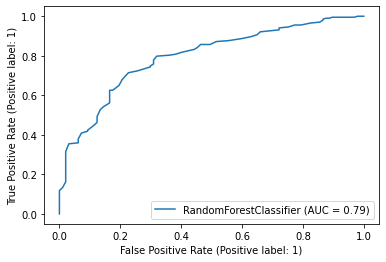

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
clf = RandomForestClassifier() 
clf.fit(X_train,y_train)

plot_roc_curve(clf, X_test, y_test)

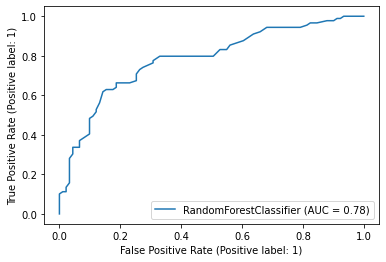

In [8]:
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=321)
clf_re = RandomForestClassifier() 
clf_re.fit(X_re_train,y_re_train)

plot_roc_curve(clf_re, X_re_test, y_re_test)